<a href="https://colab.research.google.com/github/pratim808/smol-course/blob/main/6_synthetic_datasets/notebooks%20/instruction_sft_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a dataset for instruction tuning

This notebook will guide you through the process of generating a dataset for instruction tuning. We'll use the `distilabel` package to generate a dataset for instruction tuning.

So let's dig in to some instruction tuning datasets.

<div style='background-color: lightblue; padding: 10px; border-radius: 5px; margin-bottom: 20px; color:black'>
    <h2 style='margin: 0;color:blue'>Exercise: Generate a dataset for instruction tuning</h2>
    <p>Now that you've seen how to generate a dataset for instruction tuning, try generating a dataset for instruction tuning.</p>
    <p><b>Difficulty Levels</b></p>
    <p>🐢 Generate an instruction tuning dataset</p>
    <p>🐕 Generate a dataset for instruction tuning with seed data</p>
    <p>🦁 Generate a dataset for instruction tuning with seed data and with instruction evolution</p>
</div>

## Install dependencies

Instead of transformers, you can also install `vllm` or `hf-inference-endpoints`.

In [1]:
!pip install "distilabel[hf-transformers,outlines,instructor]"

## Start synthesizing

As we've seen in the previous course content, we can create a distilabel pipelines for instruction dataset generation. The bare minimum pipline is already provided. Make sure to scale up this pipeline to generate a large dataset for instruction tuning. Swap out models, model providers and generation arguments to see how they affect the quality of the dataset. Experiment small, scale up later.

Check out the [distilabel components gallery](https://distilabel.argilla.io/latest/components-gallery/) for information about the processing classes and how to use them.

An example of loading data from the Hub instead of dictionaries is provided below.

```python
from datasets import load_dataset

with Pipeline(...) as pipeline:
    ...

if __name__ == "__main__:
    dataset = load_dataset("my-dataset", split="train")
    distiset = pipeline.run(dataset=dataset)
```

Don't forget to push your dataset to the Hub after running the pipeline!

In [ ]:
from datasets import load_dataset
dataset = load_dataset("BitBasher/sum_n_qna_dataset", split="train")

README.md:   0%|          | 0.00/550 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/123k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

val-00000-of-00001.parquet:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/448 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/56 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/56 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['instruction', 'input_content', 'expected_output'],
    num_rows: 448
})

<ipython-input-4-ad7c43061fef>:1: DeprecationWarning: Importing from 'distilabel.llms' is deprecated and will be removed in a version 1.7.0. Import from 'distilabel.models' instead.
  from distilabel.llms import TransformersLLM


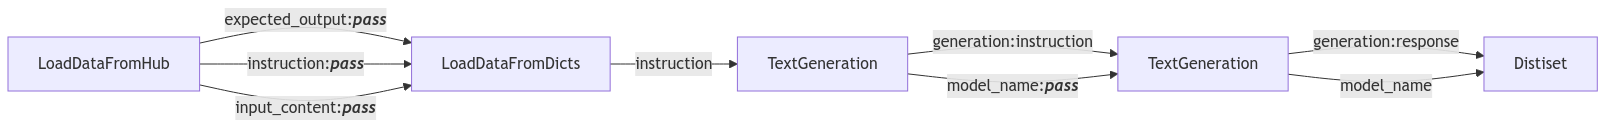

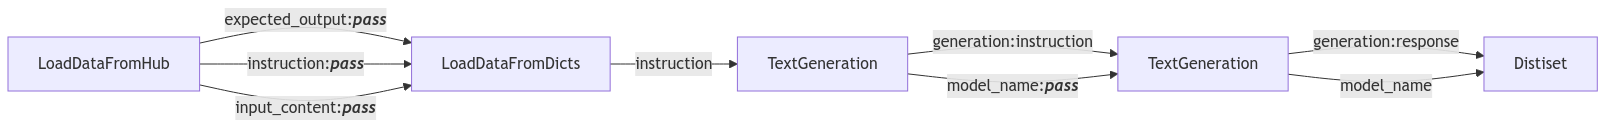

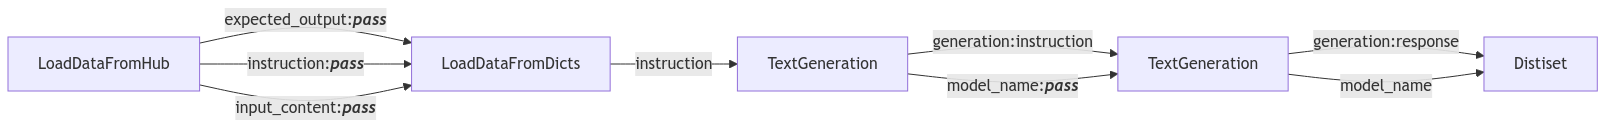

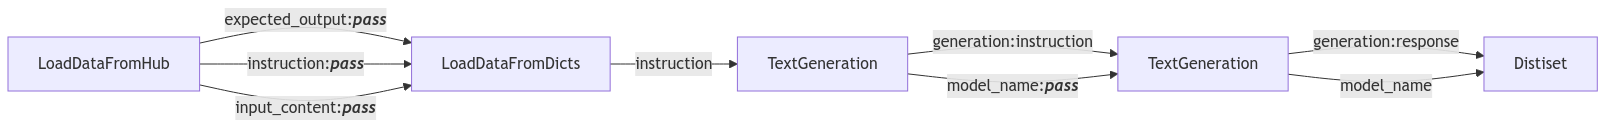

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:15                                                                             │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │        data = LoadDataFromDicts(                                                             │ │
│ │               │   exclude_from_signature={                                                   │ │
│ │               │   │   'resources',                                                           │ │
│ │               │   │   'llm_offline_batch_generation_block_until_done',                       │ │
│ │               │   │   'input_batch_size',                                                    │ │
│ │               │   │   'llm_jobs_ids',                                                        │ │
│ │               │   │   'type_info',                                                           │ │
│ │               │   │   'exclude_from_signature',                                              │ │
│ │               │   │   'gpu_memory_utilization',                                              │ │
│ │               │   │   'disable_cuda_device_placement'                                        │ │
│ │               │   },                                                                         │ │
│ │               │   name='load_data_from_dicts_0',                                             │ │
│ │               │   resources=StepResources(                                                   │ │
│ │               │   │   replicas=1,                                                            │ │
│ │               │   │   cpus=None,                                                             │ │
│ │               │   │   gpus=None,                                                             │ │
│ │               │   │   memory=None,                                                           │ │
│ │               │   │   resources=None                                                         │ │
│ │               │   ),                                                                         │ │
│ │               │   input_mappings={},                                                         │ │
│ │               │   output_mappings={},                                                        │ │
│ │               │   use_cache=True,                                                            │ │
│ │               │   batch_size=50,                                                             │ │
│ │               │   data=[                                                                     │ │
│ │               │   │   {                                                                      │ │
│ │               │   │   │   'instruction': 'Generate a short question about the Hugging Face   │ │
│ │               Smol-Course.'                                                                  │ │
│ │               │   │   }                                                                      │ │
│ │               │   ]                                                                          │ │
│ │               )                                                                              │ │
│ │     dataset = Dataset({                                                                      │ │
│ │               │   features: ['instruction', 'input_content', 'expected_output'],             │ │
│ │               │   num_rows: 448                                                              │ │
│ │               })                                                                             │ │
│ │        exit = <IPython.core.autocall.ZMQExitAutocall object at 0x78ef7a226750>               │ │
│ │       gen_a = TextGeneration(                                                                │ │
│ │               │   exclude_from_signature={               

In [ ]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromDicts(data=[{"instruction": "Generate a short question about the Hugging Face Smol-Course."}])
    llm = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm, output_mappings={"generation": "instruction"})
    gen_b = TextGeneration(llm=llm, output_mappings={"generation": "response"})
    data >> gen_a >> gen_b

if __name__ == "__main__":
    dataset = load_dataset("BitBasher/sum_n_qna_dataset", split="train")
    distiset = pipeline.run(dataset=dataset)
    #distiset.push_to_hub("huggingface-smol-course-instruction-tuning-dataset")

In [3]:
dataset = load_dataset("BitBasher/sum_n_qna_dataset", split="train") # Add your dataset here


In [4]:
dataset

Dataset({
    features: ['instruction', 'input_content', 'expected_output'],
    num_rows: 448
})

In [ ]:
dataset = load_dataset("BitBasher/sum_n_qna_dataset", split="train") # Add your dataset here
    dataset = dataset['train']


In [7]:
dataset = dataset.select(range(5))


In [8]:
dataset

Dataset({
    features: ['instruction', 'input_content', 'expected_output'],
    num_rows: 5
})

In [21]:
from datasets import load_dataset
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    # Removed LoadDataFromDicts
    llm = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm, output_mappings={"generation": "instruction"}, input_mappings={"instruction": "input_content"}) # Uses the input_content column
    gen_b = TextGeneration(llm=llm, output_mappings={"generation": "response"}, input_mappings={"instruction": "input_content"})
    gen_a >> gen_b

if __name__ == "__main__":



    distiset = pipeline.run(dataset=dataset)
    #distiset.push_to_hub("huggingface-smol-course-instruction-tuning-dataset")

[01/22/25 18:48:58] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=875982;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=668529;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_text_generation_0_text_genera             
                             tion_1/1bb40b4230149551e9d8a3db80f88ed5f46f944a/executions/6b9a83d6418666             
                             e9ea088dfdbbf25e67a3112675/data/steps_outputs'                                        

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=916601;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=298287;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_hub_0' (results cached, won't be loaded and                   
                             executed)                                                                             
                                - 🔄 'text_generation_0' (results cached, won't be loaded and                      
                             executed)                                                                             
                                - 🔄 'text_generation_1'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=722694;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=985565;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

Device set to use cuda:0


[01/22/25 18:49:08] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/1                 ]8;id=928504;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=479528;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'text_generation_1' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=909414;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=324873;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=185983;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=670894;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

[01/22/25 18:52:34] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=230995;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=652715;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=896076;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=898964;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

In [10]:
distiset

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['input_content', 'expected_output', 'instruction', 'distilabel_metadata', 'model_name', 'response'],
            num_rows: 50
        })
    })
})

In [16]:
dataset

Dataset({
    features: ['instruction', 'input_content', 'expected_output'],
    num_rows: 5
})

In [18]:
dataset['input_content'][0]

'AI refers to the development of computer systems that can perform tasks that would normally require human intelligence. Some examples of AI applications include:'

In [19]:
dataset['expected_output'][0]

'AI, or artificial intelligence, involves the creation of computer systems capable of performing tasks that typically require human intelligence. Examples of AI applications include speech recognition systems used in self-driving cars, security systems, and medical imaging. AI algorithms are also used for personalized recommendations on e-commerce sites and streaming services, predictive maintenance in various industries, medical diagnosis systems, autonomous vehicles, fraud detection in financial institutions, image recognition in photo organization and security systems, natural language processing in chatbots and language translation systems, and predictive analytics in healthcare and marketing.'

In [15]:
distiset['default']['train']['instruction'][0]

"That's correct! AI is indeed about developing computers or machines that can think and learn like humans. This includes tasks such as problem-solving, decision making, understanding natural language, recognizing patterns, and even learning from experience. \n\nSome common AI applications include virtual assistants (like Siri or Alexa), self-driving cars, recommendation algorithms used in streaming services, facial recognition software, and more. These technologies use machine learning and deep learning techniques to improve their performance over time."

In [22]:
distiset['default']['train']['instruction'][0]

"That's correct! AI is indeed about developing computers or machines that can think and learn like humans. This includes tasks such as problem-solving, decision making, understanding natural language, recognizing patterns, and even learning from experience. \n\nSome common AI applications include virtual assistants (like Siri or Alexa), self-driving cars, recommendation algorithms used in streaming services, facial recognition software, and more. These technologies use machine learning and deep learning techniques to improve their performance over time."

In [20]:
distiset['default']['train']['response'][0]

'AI stands for Artificial Intelligence. It refers to the development of computer systems that can perform tasks requiring human intelligence, such as visual perception, speech recognition, decision-making, and language translation. AI involves creating machines that can think and learn like humans. Common applications of AI include virtual assistants, self-driving cars, recommendation algorithms, facial recognition software, and many others. These technologies often utilize machine learning and deep learning methods to enhance their capabilities over time.'

In [23]:
distiset['default']['train']['response'][0]

"That's correct! AI is indeed about developing computer systems that can think and act like humans in various ways. These systems use complex algorithms and data analysis to learn from experience, understand natural language, recognize patterns, and make decisions. Examples of AI applications include virtual assistants like Siri or Alexa, self-driving cars, image recognition software, and recommendation systems used on websites and streaming platforms."

## 🌯 That's a wrap

You've now seen how to generate a dataset for instruction tuning. You could use this to:

- Generate a dataset for instruction tuning.
- Create evaluation datasets for instruction tuning.

Next

🧑‍🏫 Learn - About [generating preference datasets](./preference_datasets.md)
🏋️‍♂️ Fine-tune a model for instruction tuning with a synthetic dataset based on the [instruction tuning chapter](../../1_instruction_tuning/README.md)
